In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import os

os.chdir(r"D:\AI\NTI summer training\Final Evaluation Data")

In [ ]:
# Set the working directory (consider using relative paths or config for portability)
#os.chdir(r"D:\AI\NTI summer training\Final Evaluation Data")

# Load datasets
train = pd.read_csv('UNSW_NB15_training-set.csv')
test = pd.read_csv('UNSW_NB15_testing-set.csv')



In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

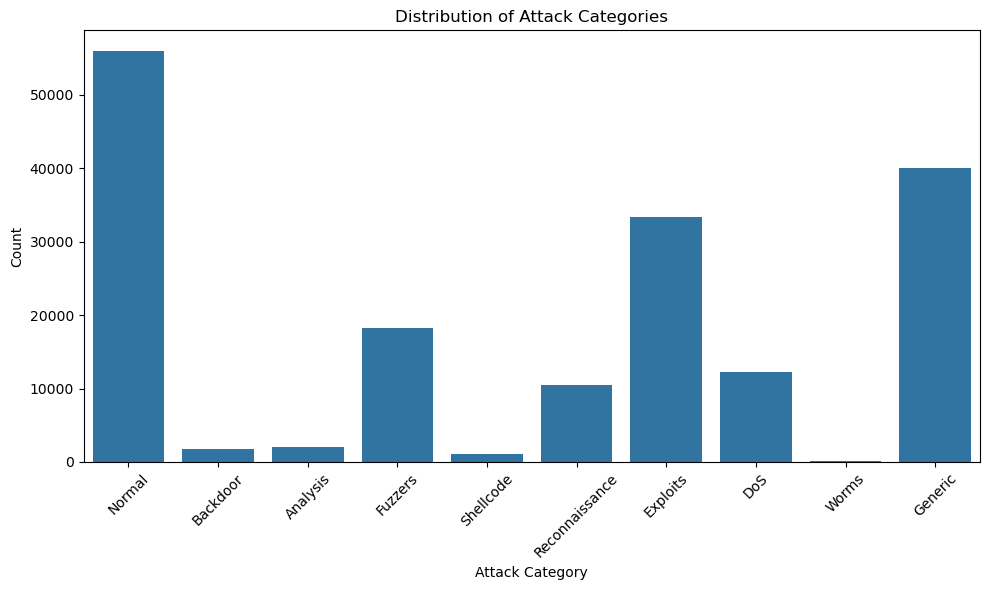

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='attack_cat', data=train)
plt.title("Distribution of Attack Categories")
plt.xlabel("Attack Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
train.describe()
test.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
train.isnull().sum()
test.isnull().sum()


id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
# Check for duplicate rows in the training and testing datasets
print("Duplicate rows in Training Data:", train.duplicated().sum())
print("Duplicate rows in Testing Data:", test.duplicated().sum())

Duplicate rows in Training Data: 0
Duplicate rows in Testing Data: 0


In [ ]:
train[['label', 'attack_cat']].value_counts()

label  attack_cat    
0      Normal            56000
1      Generic           40000
       Exploits          33393
       Fuzzers           18184
       DoS               12264
       Reconnaissance    10491
       Analysis           2000
       Backdoor           1746
       Shellcode          1133
       Worms               130
Name: count, dtype: int64

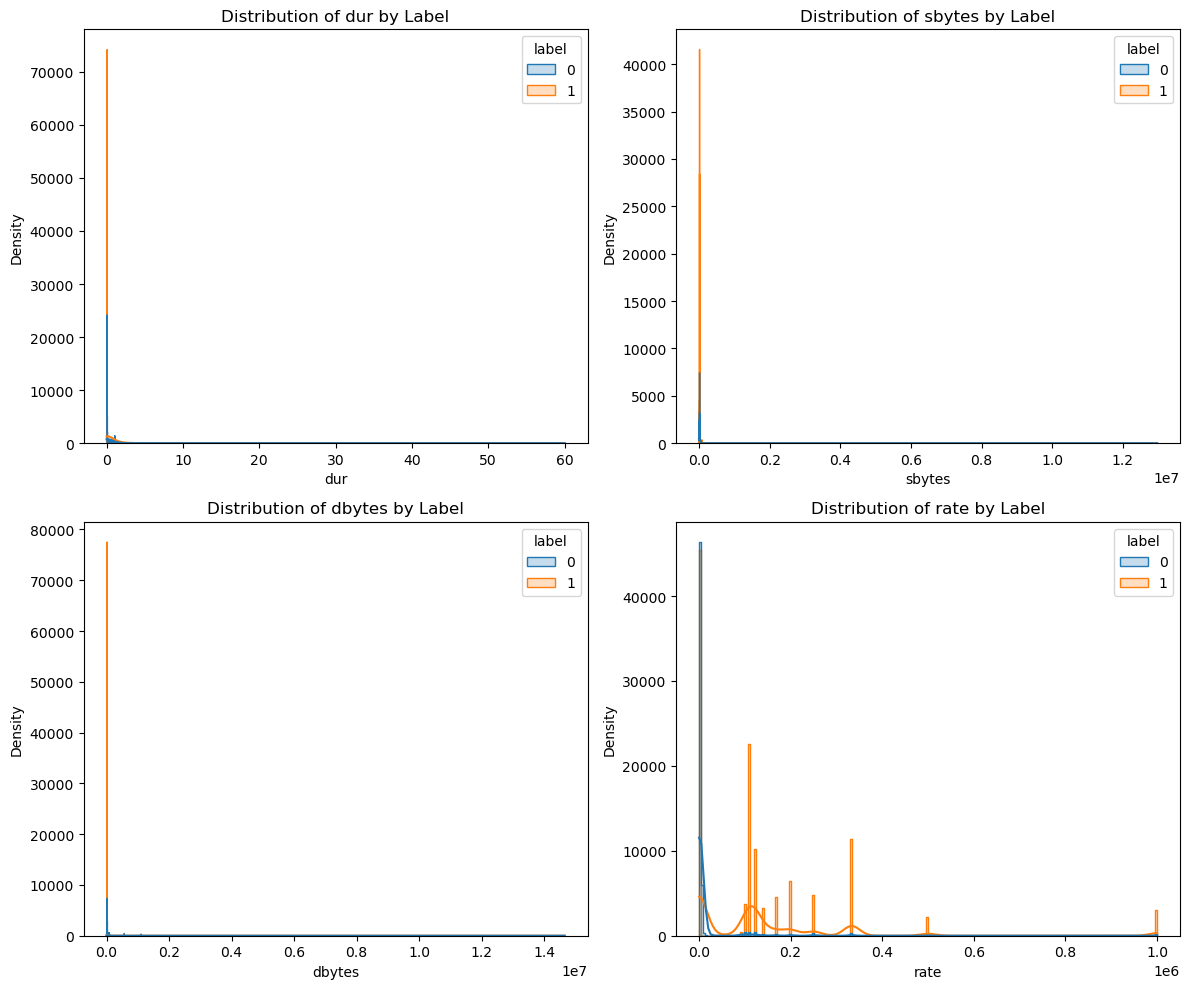

In [ ]:
features = ['dur', 'sbytes', 'dbytes', 'rate']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=train, x=feature, hue='label', kde=True, ax=ax, element='step')
    ax.set_title(f"Distribution of {feature} by Label")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

c:\Users\omar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


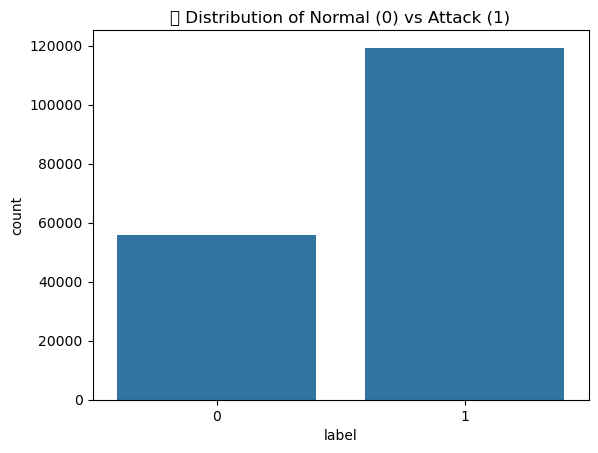

In [ ]:
sns.countplot(x='label', data=train)
plt.title("📊 Distribution of Normal (0) vs Attack (1)")
plt.show()

C:\Users\omar\AppData\Local\Temp\ipykernel_3540\3702396596.py:5: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\omar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


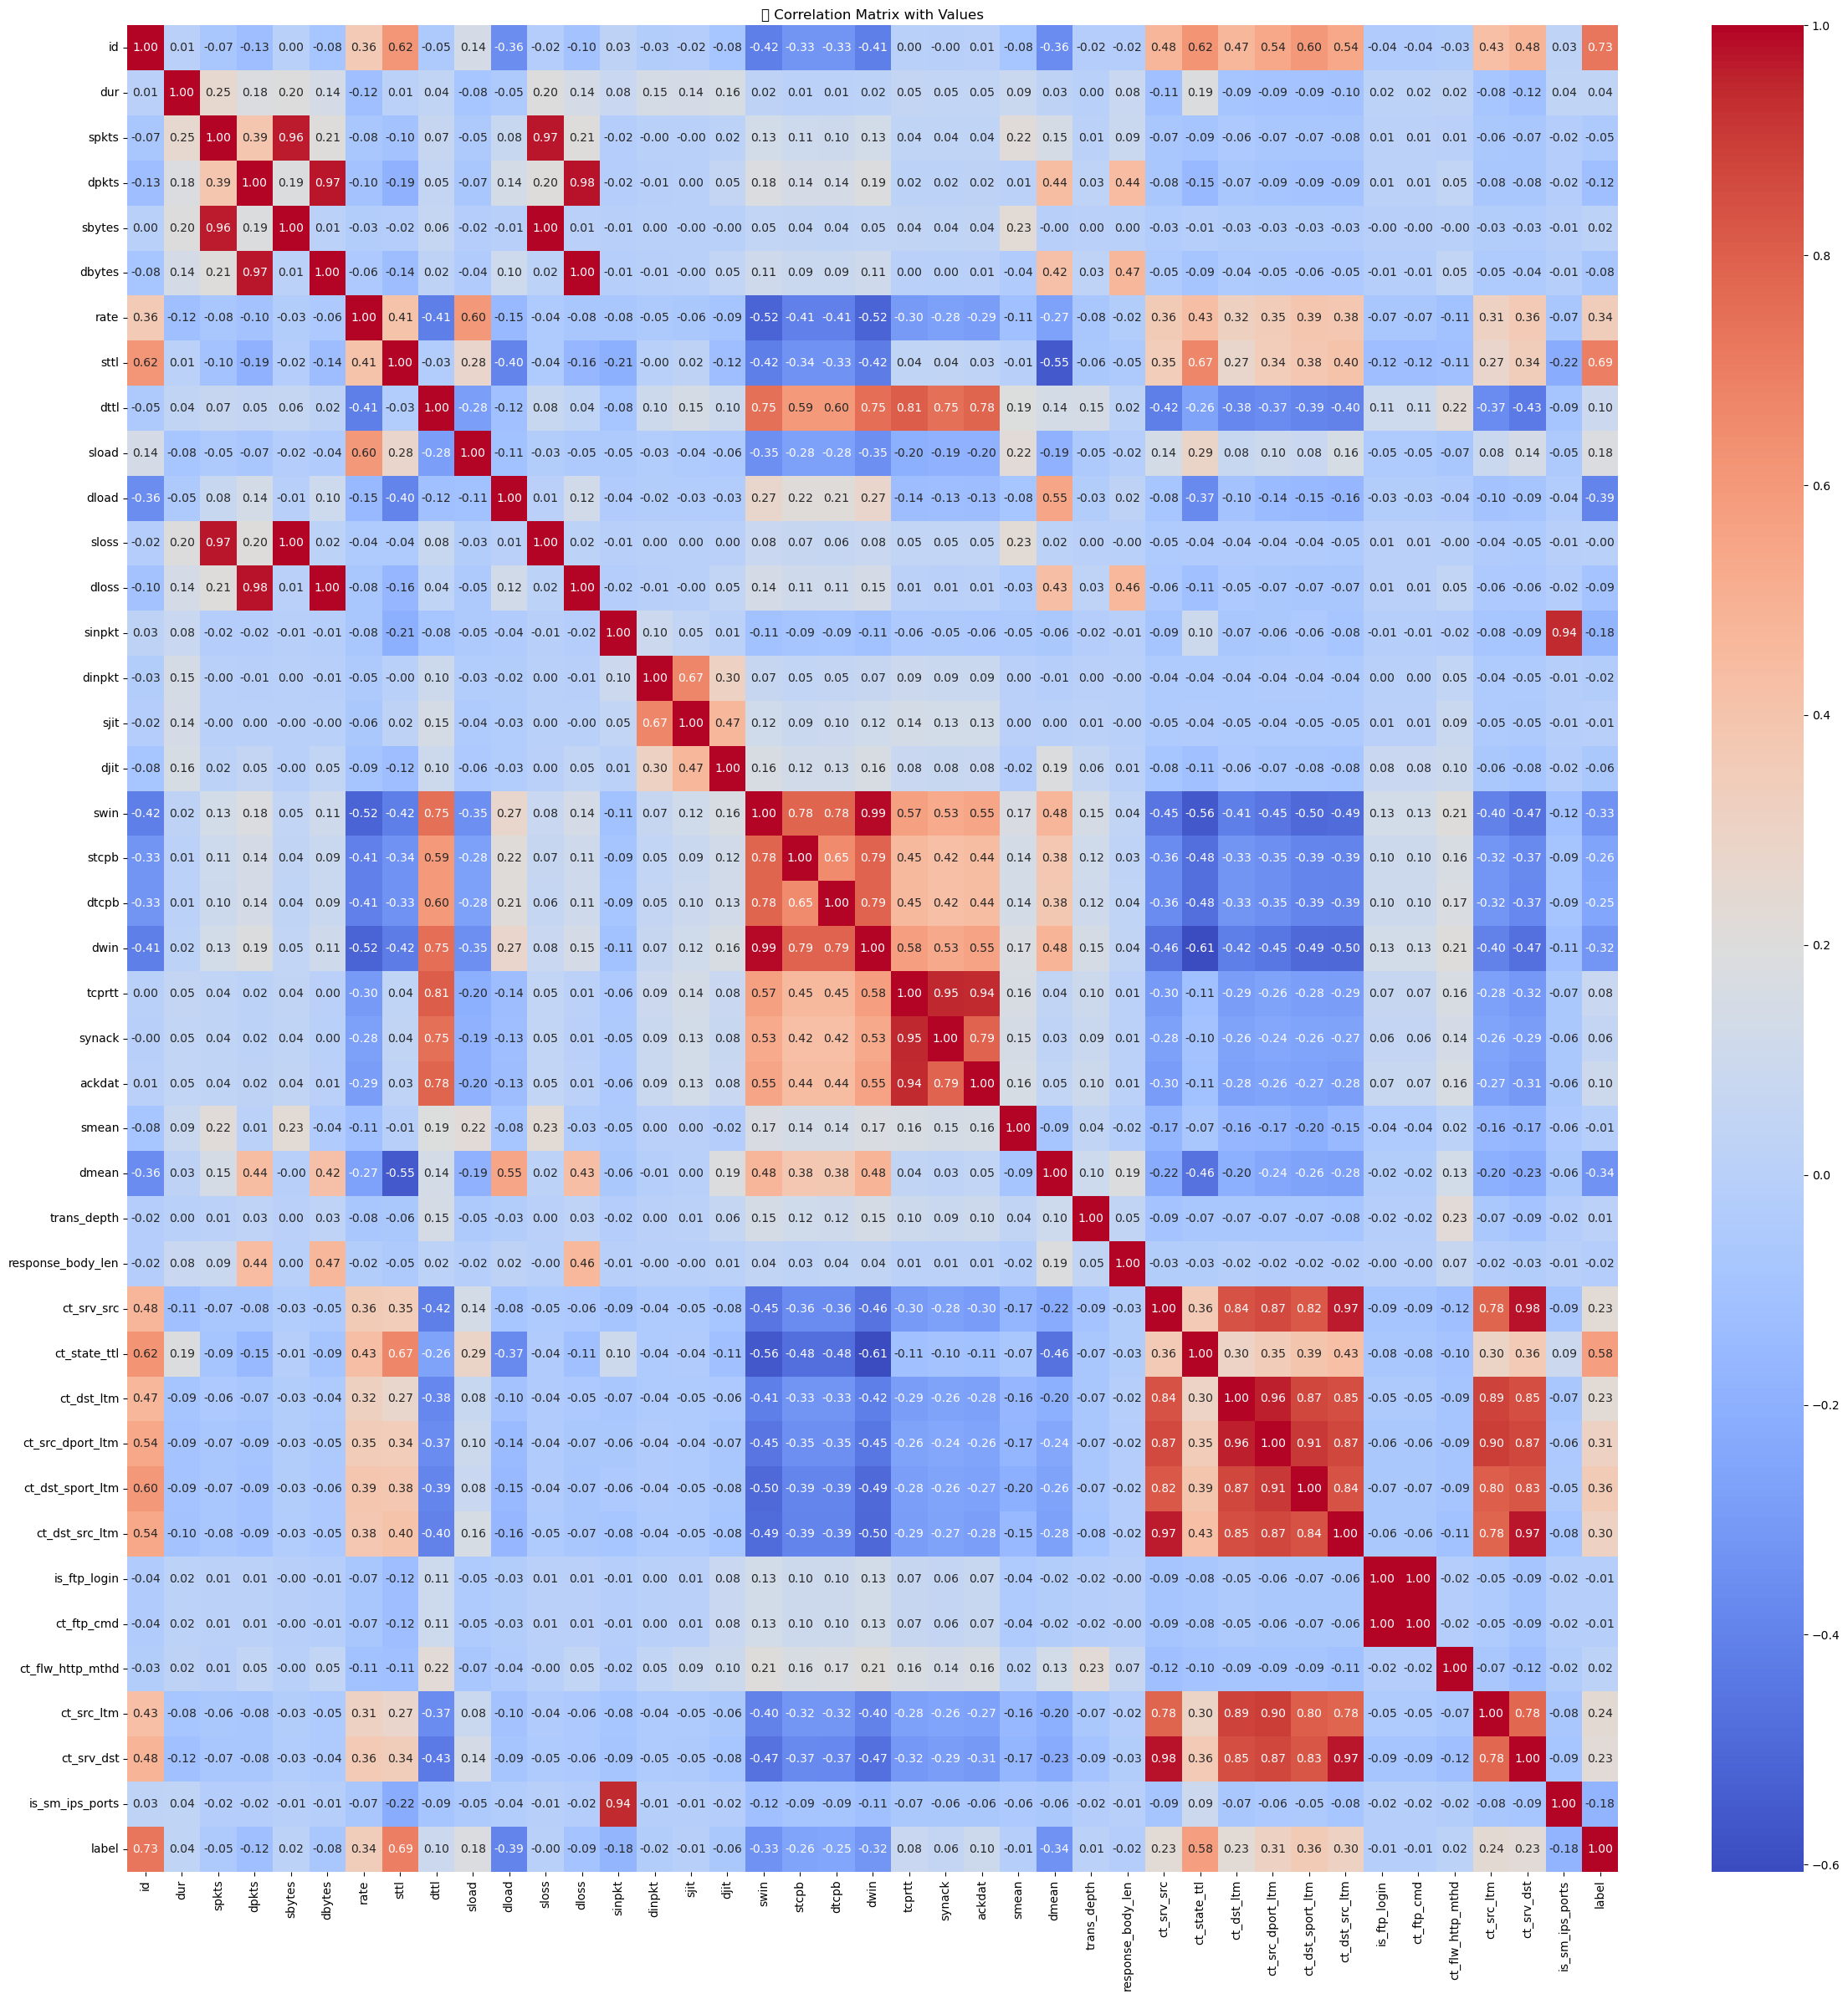

In [ ]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(24,24))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("🔗 Correlation Matrix with Values")
plt.tight_layout()
plt.show()

In [ ]:
# Drop unnecessary 'id' column
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

# One-hot encode categorical variables
train = pd.get_dummies(train, columns=['proto', 'service', 'state'], drop_first=True)
test = pd.get_dummies(test, columns=['proto', 'service', 'state'], drop_first=True)



In [ ]:
# Align train and test sets to ensure same columns
train, test = train.align(test, join='inner', axis=1)

# Separate features and target
X_train = train.drop(['label', 'attack_cat'], axis=1)
y_train = train['label']
X_test = test.drop(['label', 'attack_cat'], axis=1)
y_test = test['label']


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Number of PCA components retained: {pca.n_components_}")
# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))



Number of PCA components retained: 147
Class distribution in training set:
label
1    0.680622
0    0.319378
Name: proportion, dtype: float64


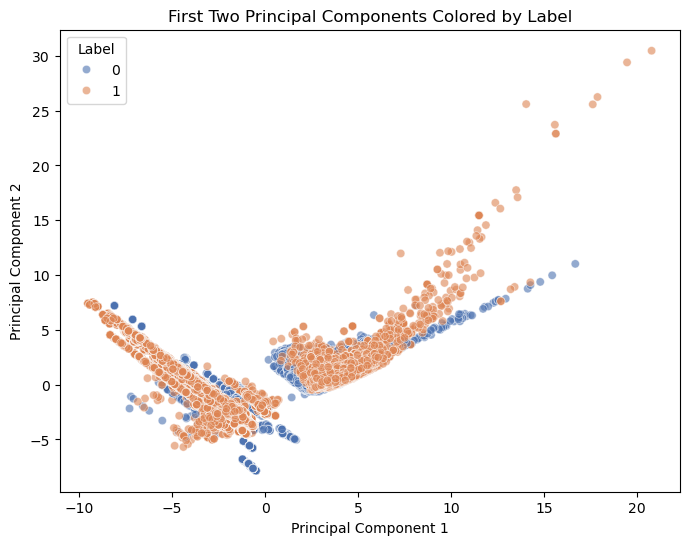

In [ ]:
pca_df = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['label'] = y_train.values

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='deep', alpha=0.6)
plt.title("First Two Principal Components Colored by Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label")
plt.show()

In [ ]:
# Optional: Handle class imbalance with SMOTE (uncomment if needed)
smote = SMOTE(random_state=42)
X_train_pca, y_train = smote.fit_resample(X_train_pca, y_train)
print("Class distribution after SMOTE:")
print(pd.Series(y_train).value_counts(normalize=True))



Class distribution after SMOTE:
label
0    0.5
1    0.5
Name: proportion, dtype: float64


✅ Confusion Matrix:
[[29608  7392]
 [ 3164 42168]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     37000
           1       0.85      0.93      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.88      0.87      0.87     82332
weighted avg       0.87      0.87      0.87     82332


✅ Accuracy Score:
0.8717873973667589


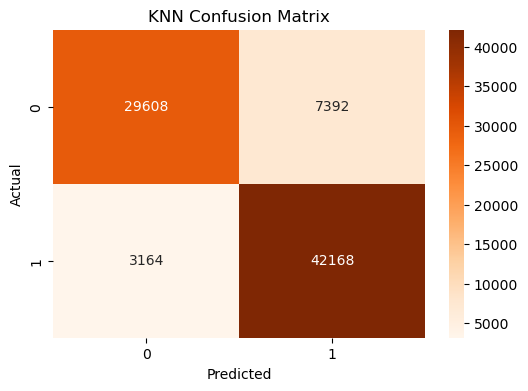

In [ ]:
#Train KNN with the best k
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

# Evaluate the model
print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Sample 20% of the training data for hyperparameter tuning
from sklearn.model_selection import train_test_split

# Combine features and labels for sampling
train_data = pd.DataFrame(X_train_pca)
train_data['label'] = y_train.reset_index(drop=True) # Reset index to align

# Sample the combined data
train_sample = train_data.sample(frac=0.2, random_state=42)

# Separate features and labels from the sample
X_train_sample = train_sample.drop('label', axis=1)
y_train_sample = train_sample['label']


#Hyperparameter tuning on the sample
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=1)  # Use n_jobs=1
grid_search.fit(X_train_sample, y_train_sample)
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value from GridSearchCV: {best_k}")

#Train KNN with the best k on full data
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

Best k value from GridSearchCV: 5


✅ Confusion Matrix:
[[29608  7392]
 [ 3164 42168]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     37000
           1       0.85      0.93      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.88      0.87      0.87     82332
weighted avg       0.87      0.87      0.87     82332


✅ Accuracy Score:
0.8717873973667589


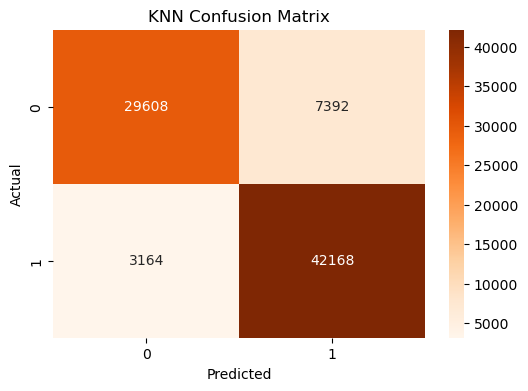

In [ ]:
# Evaluate the model
print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Confusion Matrix:
[[24419 12581]
 [ 5122 40210]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73     37000
           1       0.76      0.89      0.82     45332

    accuracy                           0.78     82332
   macro avg       0.79      0.77      0.78     82332
weighted avg       0.79      0.78      0.78     82332


✅ Accuracy Score:
0.784980323567993


c:\Users\omar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


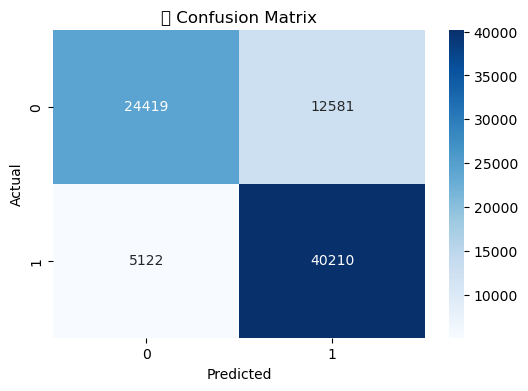

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("\n✅ Accuracy Score:")
print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(splitter='best', max_depth=3, random_state=42)
dt_model.fit(X_train_pca,y_train)
predictdt_y = dt_model.predict(X_test_pca)
accuracy_dt = dt_model.score(X_test_pca,y_test)
print("Decision Tree accuracy is :", accuracy_dt)


Decision Tree accuracy is : 0.7558907836564155


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=4)
rf_model.fit(X_train_pca,y_train)
predictrf_y = rf_model.predict(X_test_pca)
accuracy_rf = rf_model.score(X_test_pca,y_test)
print("Random Forest Classifier accuracy is :", accuracy_dt)

Random Forest Classifier accuracy is : 0.7558907836564155


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=3,random_state=42)
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)
print("Accuracy:", model.score(X_test_pca, y_test))

c:\Users\omar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7739275129961619


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_pca, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

c:\Users\omar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\omar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\omar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\omar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\omar\an

Cross-validation scores: [0.82022331 0.77700735 0.80308363 0.849757   0.85321351]
Mean cross-validation score: 0.8206569581420327


In [ ]:
from xgboost import XGBClassifier

#Set objective and num_class for multiclass classification
num_classes = len(np.unique(y_train))
model = XGBClassifier(n_estimators=100, random_state=42, objective='multi:softmax', num_class=num_classes)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print("Accuracy:", model.score(X_test_pca, y_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train_pca , y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Accuracy: 0.8786255647864742
Cross-validation scores: [0.92322517 0.92194734 0.92355874 0.96954081 0.97161471]
Mean cross-validation score: 0.9419773538943034


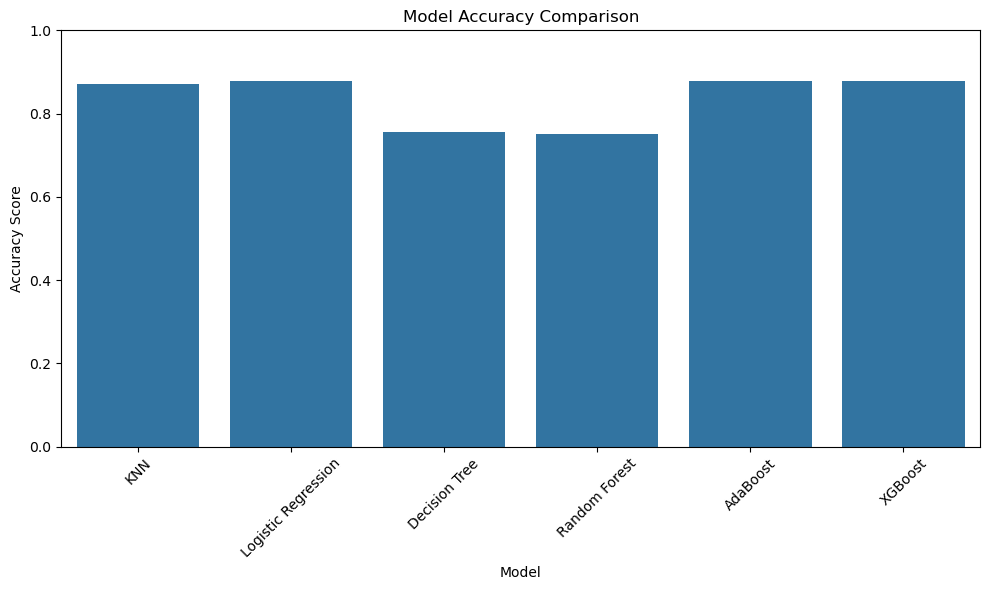

In [ ]:
models = {
    "KNN": accuracy_score(y_test, knn.predict(X_test_pca)),
    "Logistic Regression": accuracy_score(y_test, model.predict(X_test_pca)),  # from LogisticRegression section
    "Decision Tree": dt_model.score(X_test_pca, y_test),
    "Random Forest": rf_model.score(X_test_pca, y_test),
    "AdaBoost": model.score(X_test_pca, y_test),  # from AdaBoost section
    "XGBoost": model.score(X_test_pca, y_test)   # from XGBoost section
}

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=list(models.values()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
#declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_pca, y_train)
print("Best parameters found: ", grid_search.best_params_)